In [1]:
# 트럼프 대통령의 트윗 모음
from tweets import trump_tweets

# 그래프에 필요한 라이브러리
import matplotlib.pyplot as plt

# 단어구름에 필요한 라이브러리
import numpy as np
from PIL import Image
from wordcloud import WordCloud

# 특화된 컨테이너 모듈에서 수 세기를 돕는 메소드
from collections import Counter

# 문자열 모듈에서 특수문자를 처리를 돕는 메소드
from string import punctuation

In [2]:
trump_tweets[0:5]

[('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!'),
 ('01-19-2017 20:21:36',
  'Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz'),
 ('01-20-2017 00:40:51',
  'Thank you for joining us at the Lincoln Memorial tonight- a very special evening! Together we are going to MAKE AM… https://t.co/OSxa3BamHs'),
 ('01-20-2017 04:24:33',
  'Thank you for a wonderful evening in Washington D.C. #Inauguration https://t.co/a6xpFQTHj5')]

In [3]:
trump_tweets[0]

('01-19-2017 20:13:57', 'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe')

In [4]:
len(trump_tweets)

2553

In [5]:
text = trump_tweets[0][1]
text

'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'

## preprocess_text 함수
* 전(pre) 처리(process) 해주는 함수
* input : string(문자열) 
* output: list
* 소문자 / @ , # 을 제외한 특수문자 제거
* 띄어쓰기 단위로 split 된 word list반환

In [7]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
# 데이터 전처리
def preprocess_text(text):
    # 텍스트를 전부 소문자로 변환
    text = text.lower()
    
    # @와 #을 제외한 특수문자로 이루어진 문자열 symbols를 만든다.
    symbols = punctuation.replace('@','').replace('#','')
    
    # text에서 @와 #을 제외한 모든 특수문자를 제거한다.
    for symbol in symbols:
        text = text.replace(symbol,'')
        
    # text를 띄어쓰기 단위로 쪼갠다.
    words = text.split()
    return words

### output

In [10]:
# input 
text

'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'

In [12]:
# output
preprocess_text(text)

['on', 'my', 'way', '#inauguration2017', 'httpstcohoumbxgnpe']

## Step by step

#### lower/upper

In [14]:
txt = 'Hi, my name is SooYeon'
txt.lower()

'hi, my name is sooyeon'

In [15]:
txt = 'Hi, my name is SooYeon'
txt.upper()

'HI, MY NAME IS SOOYEON'

#### tweets

In [17]:
print(text.lower())
text.upper()

on my way! #inauguration2017 https://t.co/houmbxgnpe


'ON MY WAY! #INAUGURATION2017 HTTPS://T.CO/HOUMBXGNPE'

#### punctuation

In [20]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
punctuation.replace('^', '')

'!"#$%&\'()*+,-./:;<=>?@[\\]_`{|}~'

In [23]:
punctuation.replace('^', '').replace('\\','')

'!"#$%&\'()*+,-./:;<=>?@[]_`{|}~'

#### for loop with punctuation

In [24]:
symbols = punctuation.replace('@','').replace('#','')
symbols

'!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

In [25]:
type(symbols)

str

In [26]:
for s in symbols:
    text = text.replace(s,'')
text

'On my way #Inauguration2017 httpstcohOuMbxGnpe'

In [27]:
# 같은 구문
for symbol in symbols:
    text = text.replace(symbol,'')
text

'On my way #Inauguration2017 httpstcohOuMbxGnpe'

#### split

In [30]:
# text를 띄어쓰기 단위로 쪼갠다.
words = text.split()
words

['On', 'my', 'way', '#Inauguration2017', 'httpstcohOuMbxGnpe']

> 우리가 만든 사용자 정의 함수 UDF 가 리턴하는 값 --> **list** --> 중요!!

## analyze_text 함수
* words 들을 해시태그, 멘션, 키워드 3가지로 구분하는 역할 
* input : 단어들의 리스트 1개 (위의 preprocess_text() 함수가 return 하는 리스트)
* output: 리스트 3개를 리턴 (hashtag list, mentions list, keywords list)

In [38]:
# 해시태그와 키워드 추출
def analyze_text(words):
    # 키워드, 해시태그, 멘션을 저장할 리스트를 각각 생성
    keywords, hashtags, mentions = [], [], []
    
    # 걸러낼 단어를 자유롭게 추가 or 삭제
    filter_words = ['the', 'to', 'of', 'in', 'for', 'and', 
                    'from', 'is', 'on', 'it', 'this', 'that', 'are', 
                    'was', 'will', 'with', 'very', 'a', 'be', 'by', 
                    'must', 'just', 'not']
    # 쪼갠 단어들을 분류
    for word in words:
        
        
        # fitler_words 를 이용해 의미없는 단어를 제거
        # if word in filter_words:
        #     continue
        
        # 해시태그 일 경우
        if word.startswith('#'):
            # 해시(#)를 제외한 단어를 plain_word 변수에 저장
            plain_word = word[1:]
        
            # plain_word를 리스트에 추가
            keywords.append(plain_word)
            hashtags.append(plain_word)
            
        elif word.startswith('#'):
            # @를 제외한 단어를 plain_word 변수에 저장
            plain_word = word[1:]
            
            # plain_word를 리스트에 추가
            keywords.append(plain_word)
            mentions.append(plain_word)
        
        # 둘 다 아닐 경우
        else:
            # word를 적절한 리스트에 추가
            keywords.append(word)
        
    return keywords, hashtags, mentions

### output

In [39]:
# input
preprocess_text(text)

['on', 'my', 'way', '#inauguration2017', 'httpstcohoumbxgnpe']

In [40]:
# output
analyze_text(preprocess_text(text))

(['on', 'my', 'way', 'inauguration2017', 'httpstcohoumbxgnpe'],
 ['inauguration2017'],
 [])

### Step by step

#### startswith

In [42]:
txt = '#apple'
txt.startswith('#')

True

In [43]:
txt[1:]

'apple'

#### practice

* 1

In [46]:
words_list = ['#good','#morning','@sooyeon','#challenge','#record','@jihyun', '@seola']

hashtag_word_list = []
mention_word_list = []

for word in words_list:
    if word.startswith('#'):
        hashtag_word_list.append(word[1:])
    elif word.startswith('@'):
        mention_word_list.append(word[1:])

* 2

In [56]:
words_list = ['#good','#morning','@sooyeon','#challenge','#record','@jihyun', '@seola']

hashtag_word_list = []
mention_word_list = []

for word in words_list:
    if word.startswith('#'):
        plain_word = word[1:]
        hashtag_word_list.append(plain_word)
    elif word.startswith('@'):
        plain_word = word[1:]
        mention_word_list.append(plain_word)

In [57]:
hashtag_word_list

['good', 'morning', 'challenge', 'record']

In [58]:
mention_word_list

['sooyeon', 'jihyun', 'seola']

## filter_by_month 함수
* 월별로 트윗 데이터를 필터링(나누는) 함수
* input : tweet_data 그 자체 (튜플들의 리스트)
* output : 필터링된 해당 월의 트윗데이터를 가지는 '리스트'를 return

In [120]:
def filter_by_month(tweet_data, month):
    # month를 문자열로 바꾼 month_string 선언
    # 이 때 한 자리 수는 앞에 '0'을 넣어준다. (ex : 1 => '01')
    month_string = '0' + str(month) if month < 10 else str(month)
    
    # 선택한 달의 트윗을 filtered_tweets에 저장
    filtered_tweets = []
    for date,tweet in tweet_data:
        # 트윗의 날짜가 선택한 달에 속해 있으면 트윗의 내용을 filtered_tweets에 추가
        if date.startswith(month_string):
            filtered_tweets.append(tweet)
    return filtered_tweets

#### output

In [63]:
# input
display(trump_tweets[0:3])

[('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!'),
 ('01-19-2017 20:21:36',
  'Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz')]

In [65]:
# output
filter_by_month(trump_tweets[0:3],1)

['On my way! #Inauguration2017 https://t.co/hOuMbxGnpe',
 'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!',
 'Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz']

### Step by step

#### month -> month_string

In [68]:
month = 9

if month < 10:
    month_string = '0' +str(month)
else:
    month_string = str(month)
    
month_string

'09'

#### 한 줄 코드

In [69]:
month = 7
month_string = '0'+str(month) if month < 10 else str(month)
month_string

'07'

In [70]:
# 같은 결과 
month = 7
month_string = ('0'+str(month)) if month < 10 else str(month)
month_string

'07'

#### 선택한 달의 트윗을 filtered_tweets에 저장

In [72]:
tweet_data = [('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!')]
tweet_data

[('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!')]

* date

In [74]:
for date, tweet in tweet_data:
    print(date)

01-19-2017 20:13:57
01-19-2017 20:18:32


* tweets

In [78]:
for date, tweet in tweet_data:
    print(tweet)

On my way! #Inauguration2017 https://t.co/hOuMbxGnpe
Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!


## show_stats 함수
* 트윗의 통계를 출력
* input : 없음
* output : 트윗 통계

In [116]:
def show_stats():
    keyword_counter = Counter()
    hashtag_counter = Counter()
    mention_counter = Counter()
    
    for _, tweet in trump_tweets:
        keyward, hashtag, mention = analyze_text(preprocess_text(tweet))
        keyword_counter += Counter(keyward)
        hashtag_counter += Counter(hashtag)
        mention_counter += Counter(mention)
    
    # 가장 많이 등장한 키워드, 해시태그, 멘션 출력
    top_ten = hashtag_counter.most_common(10)
    for hashtag, freq in top_ten:
        print('{}:{}회'.format(hashtag, freq))

#### output

In [117]:
show_stats()

maga:28회
usa🇺🇸:23회
fakenews:15회
taxreform:12회
hurricaneharvey:11회
maga🇺🇸:10회
icymi:8회
harvey:8회
obamacare:7회
unga:7회


> MAGA : Make America Great Again<br>
UNGA : United Nation General Assembly.<br>
icymi : In Case You Missed It

#### Counter
* collections 모듈의 Counter 클래스
* 어떤 문자열이나 숫자 리스트가 주어졌을 때, 해당 문자열/리스트 에서 어떤 객체가 몇 번 등장했는지<br>
알아서 count, 딕셔너리를 만들어준다.
* 대/소문자 구별
* key: 객체 value: 객체의 등장 횟수

In [85]:
hashtag_word_list

['good', 'morning', 'challenge', 'record']

In [86]:
Counter(hashtag_word_list)

Counter({'good': 1, 'morning': 1, 'challenge': 1, 'record': 1})

#### step by step

In [96]:
hashtag_counter = Counter()
hashtag_counter

Counter()

In [97]:
hashtag_counter = hashtag_counter + Counter(hashtag_word_list)
hashtag_counter

Counter({'good': 1, 'morning': 1, 'challenge': 1, 'record': 1})

In [98]:
hashtag_counter = hashtag_counter + Counter(hashtag_word_list)
hashtag_counter

Counter({'good': 2, 'morning': 2, 'challenge': 2, 'record': 2})

#### for loop

In [89]:
trump_tweets[0:3]

[('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!'),
 ('01-19-2017 20:21:36',
  'Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz')]

In [91]:
for _, tweet in trump_tweets[0:10]:
    print(_, end='  ')

01-19-2017 20:13:57  01-19-2017 20:18:32  01-19-2017 20:21:36  01-20-2017 00:40:51  01-20-2017 04:24:33  01-20-2017 12:31:53  01-20-2017 17:51:25  01-20-2017 17:51:58  01-20-2017 17:52:45  01-20-2017 17:53:17  

In [93]:
### _ -> date
for date, tweet in trump_tweets[0:10]:
    print(date, end='  ')

01-19-2017 20:13:57  01-19-2017 20:18:32  01-19-2017 20:21:36  01-20-2017 00:40:51  01-20-2017 04:24:33  01-20-2017 12:31:53  01-20-2017 17:51:25  01-20-2017 17:51:58  01-20-2017 17:52:45  01-20-2017 17:53:17  

In [92]:
for _, tweet in trump_tweets[0:10]:
    print(tweet, end='  ')

On my way! #Inauguration2017 https://t.co/hOuMbxGnpe  Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!  Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz  Thank you for joining us at the Lincoln Memorial tonight- a very special evening! Together we are going to MAKE AM… https://t.co/OSxa3BamHs  Thank you for a wonderful evening in Washington D.C. #Inauguration https://t.co/a6xpFQTHj5  It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!  Today we are not merely transferring power from one Administration to another or from one party to another – but we are transferring...  power from Washington D.C. and giving it back to you the American People. #InaugurationDay  What truly matters is not which party controls our government but whether our government is controlled by the people.  January 20th 2017 will be remembered as the day the people became the rulers of this na

#### >> '_' : non-name for a parameter that is never used

#### mostly

In [99]:
hashtag_counter = hashtag_counter + Counter({'good': 1, 'morning': 3, 'challenge': 7, 'record': 9})
hashtag_counter

Counter({'good': 3, 'morning': 5, 'challenge': 9, 'record': 11})

#### most_common 
* Counter.most_common() 메서드
* 빈도가 가장 많은 요소와 요소의 개수
* 데이터의 개수가 많은 순으로 정렬된 배열을 리턴

In [100]:
top_two = hashtag_counter.most_common(2)
top_two

[('record', 11), ('challenge', 9)]

In [101]:
for hashtag, freq in top_two:
    print(hashtag)

record
challenge


In [102]:
for hashtag, freq in top_two:
    print(freq)

11
9


In [103]:
for hashtag, freq in top_two:
    print('{}: {}회'.format(hashtag, freq))

record: 11회
challenge: 9회


In [107]:
for hashtag, freq in hashtag_counter.most_common(4):
    print('{}: {}회'.format(hashtag, freq))

record: 11회
challenge: 9회
morning: 5회
good: 3회


## show_tweets_by_month 함수
* 월별 트윗 현황을 그래프로 시각화
* input : 없음
* output : 막대그래프

#### output

In [123]:
# 월 별 트윗 개수를 보여주는 그래프를 출력
def show_tweets_by_month():
    months = range(1, 13)
    num_tweets = [len(filter_by_month(trump_tweets, month)) for month in months]
    
    plt.bar(months, num_tweets, align='center')
    plt.xticks(months, months)   # location, label
    
    plt.savefig('graph.png')

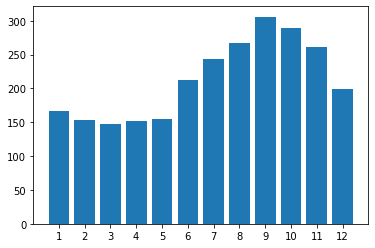

In [124]:
show_tweets_by_month()

#### range

In [125]:
range(1,13)

range(1, 13)

In [126]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### list comprehension

In [129]:
h_letters = [letter for letter in 'sooyeon']
print(h_letters)

['s', 'o', 'o', 'y', 'e', 'o', 'n']


#### Step by step

In [139]:
months = range(1,13)
for month in months:
    print(month, len(filter_by_month(trump_tweets, month)))

1 166
2 154
3 147
4 152
5 155
6 212
7 244
8 267
9 306
10 290
11 261
12 199


In [137]:
months = range(1,13)
num_li = []
for month in months:
    tmp = len(filter_by_month(trump_tweets, month))
    num_li.append(tmp)

In [138]:
num_li

[166, 154, 147, 152, 155, 212, 244, 267, 306, 290, 261, 199]

[len(filter_by_month(trump_tweets,month)) for month in months]

In [132]:
months = range(1,13)
num_tweets = [len(filter_by_month(trump_tweets, month)) for month in months ]
num_tweets

[166, 154, 147, 152, 155, 212, 244, 267, 306, 290, 261, 199]

#### filter_by_month 함수
* output : 필터링 된 해당 월의 트윗데이터를 가지는 **리스트**를 return

In [147]:
len(filter_by_month(trump_tweets, 2))

154

In [148]:
months = range(1,13)
num_tweets = []
for month in months:
    print(len(filter_by_month(trump_tweets, month)))

166
154
147
152
155
212
244
267
306
290
261
199


In [149]:
months = range(1, 13)
num_tweets = []

for month in months:
    tmp = len(filter_by_month(trump_tweets, month))
    num_tweets.append(tmp)

num_tweets

[166, 154, 147, 152, 155, 212, 244, 267, 306, 290, 261, 199]

## create_word_cloud 함수
* 트윗 데이터를 워드클라우드로 시각화
* input : 없음
* output : 워드클라우드 이미지를 저장

In [176]:
# wordcloud 패키지를 이용해 트럼프 대통령 실루엣 모양의 단어구름을 생성
def create_word_cloud():
    
    counter = Counter()
    for _, tweet in trump_tweets:
        kewords, _, _ = analyze_text(preprocess_text(tweet))
        counter += Counter(keywords)
        
    trump_mask = np.array(Image.open('trump.png'))
    cloud = WordCloud(background_color= 'white', mask= trump_mask)
    cloud.fit_words(counter)
    cloud.to_file('cloud.png')

### Step by step

In [152]:
trump_tweets[0:3]

[('01-19-2017 20:13:57',
  'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'),
 ('01-19-2017 20:18:32',
  'Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!'),
 ('01-19-2017 20:21:36',
  'Join me at 4pm over at the Lincoln Memorial with my family!#Inauguration2017 https://t.co/GQeQpJOgWz')]

In [153]:
list_of_tuple = [(1,2), (3,4), (5,6)]
for _, i in list_of_tuple:
    print(_)

1
3
5


In [154]:
list_of_tup = [(1,2), (3,4), (5,6)]
for i, _ in list_of_tup:
    print(_)

2
4
6


#### for 문

analyze_text => 해시태그단어리스트, 멘션단어리스트, 키워드단어리스트 리턴

In [163]:
trump_tweets[0][1]

'On my way! #Inauguration2017 https://t.co/hOuMbxGnpe'

In [164]:
analyze_text(preprocess_text(trump_tweets[0][1]))

(['on', 'my', 'way', 'inauguration2017', 'httpstcohoumbxgnpe'],
 ['inauguration2017'],
 [])

In [165]:
a, b, c = analyze_text(preprocess_text(trump_tweets[0][1]))

In [166]:
display(a, b, c)

['on', 'my', 'way', 'inauguration2017', 'httpstcohoumbxgnpe']

['inauguration2017']

[]

In [168]:
keywords, _, _ = analyze_text(preprocess_text(trump_tweets[0][1]))
keywords # 키워드 이외의 중요하지 않은 변수는 _ 로 처리한다.

['on', 'my', 'way', 'inauguration2017', 'httpstcohoumbxgnpe']

In [169]:
_ # 덮어쓰기 된 변수

[]

In [155]:
counter = Counter()
# for _, tweet in trump_tweets:
keywords, _, _ = analyze_text(preprocess_text(trump_tweets[0][1]))

In [156]:
keywords

['on', 'my', 'way', 'inauguration2017', 'httpstcohoumbxgnpe']

In [158]:
counter = Counter()
# for _, tweet in trump_tweets:
keywords, i, _ = analyze_text(preprocess_text(trump_tweets[0][1]))
print(i)

['inauguration2017']


In [162]:
counter = Counter()
# for _, tweet in trump_tweets:
keywords, _, i = analyze_text(preprocess_text(trump_tweets[0][1]))
print(i)

[]


In [157]:
counter += Counter(keywords)
counter

Counter({'on': 1,
         'my': 1,
         'way': 1,
         'inauguration2017': 1,
         'httpstcohoumbxgnpe': 1})

In [170]:
keywords, _, _ = analyze_text(preprocess_text(trump_tweets[1][1]))
keywords

['great',
 'concert',
 'at',
 '400',
 'pm',
 'today',
 'at',
 'lincoln',
 'memorial',
 'enjoy']

In [171]:
counter += Counter(keywords)
counter

Counter({'great': 1,
         'concert': 1,
         'at': 2,
         '400': 1,
         'pm': 1,
         'today': 1,
         'lincoln': 1,
         'memorial': 1,
         'enjoy': 1})

#### 반복문 for loop

In [177]:
# 입력값에 따라 출력할 결과를 선택 
def main(code=1):
    # 가장 많이 등장한 키워드, 해시태그, 멘션을 출력
    if code == 1:
        show_stats()
    
    # 트럼프 대통령의 월별 트윗 개수 그래프를 출력
    if code == 2:
        show_tweets_by_month()
    
    # 트럼프 대통령의 트윗 키워드 wordcloud
    if code == 3:
        create_word_cloud()

In [173]:
main(1)

maga:28회
usa🇺🇸:23회
fakenews:15회
taxreform:12회
hurricaneharvey:11회
maga🇺🇸:10회
icymi:8회
harvey:8회
obamacare:7회
unga:7회


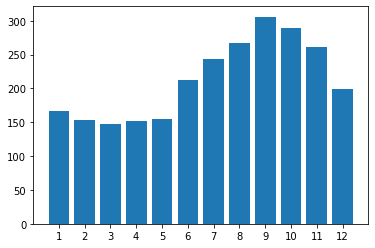

In [174]:
main(2)

In [178]:
main(3)

### 전체 코드

In [ ]:
from tweets import trump_tweets


import matplotlib.pyplot as plt

# 단어구름에 필요한 라이브러리
import numpy as np
from PIL import Image
from wordcloud import WordCloud

# 특화된 컨테이너 모듈에서 수 세기를 돕는 메소드
from collections import Counter

# 문자열 모듈에서 특수문자를 처리를 돕는 메소드
from string import punctuation


# 데이터 전처리 
def preprocess_text(text):
    # 분석을 위해 text를 모두 소문자로 변환
    text = text.lower()
    
    # @와 #을 제외한 특수문자로 이루어진 문자열 symbols
    symbols = punctuation.replace('@', '').replace('#', '')
    
    # text에서 @와 #을 제외한 모든 특수문자를 제거
    for symbol in symbols:
        text = text.replace(symbol, '')
    
    # text 띄어쓰기 단위 split
    words = text.split()
    return words
    

# 해시태그와 키워드를 추출
def analyze_text(words):
    # 키워드, 해시태그, 멘션을 저장할 리스트를 각각 생성
    keywords, hashtags, mentions = [], [], []
    
    # 걸러낼 단어
    filter_words = ['the', 'to', 'of', 'in', 'for', 'and', 'from', 'is', 'on', 'it', 'this', 'that', 'are', 'was', 'will', 'with', 'very', 'a', 'be', 'by', 'must', 'just', 'not']
    
    # 쪼갠 단어들을 분류
    for word in words:
        
        # if word in filter_words :
        #     continue
        
        # 해시태그일 경우
        if word.startswith('#'):
            # 해시(#)를 제외한 단어를 plain_word 변수에 저장
            plain_word = word[1:]
            
            # plain_word를 적절한 리스트에 추가합니다.
            keywords.append(plain_word)
            hashtags.append(plain_word)
        
        # 멘션일 경우
        elif word.startswith('@'):
            # @ 기호를 제외한 단어를 plain_word 변수에 저장
            plain_word = word[1:]
            
            # plain_word를 적절한 리스트에 추가
            keywords.append(plain_word)
            mentions.append(plain_word)
        
        # 둘 다 아닐 경우
        else:
            # word를 적절한 리스트에 추가
            keywords.append(word)
    
    return keywords, hashtags, mentions


def filter_by_month(tweet_data, month):
    # month를 문자열로 바꾼 month_string을 선언
    month_string = '0' + str(month) if month < 10 else str(month)
    
    # 선택한 달의 트윗을 filtered_tweets에 저장
    filtered_tweets = []
    for date, tweet in tweet_data:
        # 트윗의 날짜가 선택한 달에 속해 있으면 트윗의 내용을 filtered_tweets에 추가
        if date.startswith(month_string):
            filtered_tweets.append(tweet)
    
    return filtered_tweets


# 트윗 통계를 출력합니다.
def show_stats():
    keyword_counter = Counter()
    hashtag_counter = Counter()
    mention_counter = Counter()
    
    for _, tweet in trump_tweets:
        keyward, hashtag, mention = analyze_text(preprocess_text(tweet))
        keyword_counter += Counter(keyward)
        hashtag_counter += Counter(hashtag)
        mention_counter += Counter(mention)
    
    # 가장 많이 등장한 키워드, 해시태그, 멘션을 출력
    top_ten = hashtag_counter.most_common(10)
    for hashtag, freq in top_ten:
        print('{}: {}회'.format(hashtag, freq))


# 월 별 트윗 개수를 보여주는 그래프를 출력 
def show_tweets_by_month():
    months = range(1, 13)
    num_tweets = [len(filter_by_month(trump_tweets, month)) for month in months]
    
    plt.bar(months, num_tweets, align='center')
    plt.xticks(months, months)
    
    plt.savefig('graph.png')


# wordcloud 패키지를 이용해 트럼프 대통령 실루엣 모양의 단어구름을 생성
def create_word_cloud():
    
    counter = Counter()
    for _, tweet in trump_tweets:
        keywords, _, _ = analyze_text(preprocess_text(tweet))
        counter += Counter(keywords)
    
    trump_mask = np.array(Image.open('trump.png'))
    cloud = WordCloud(background_color='white', mask=trump_mask)
    cloud.fit_words(counter)
    cloud.to_file('cloud.png')



# 입력값에 따라 출력할 결과를 선택
def main(code=1):
    # 가장 많이 등장한 키워드, 해시태그, 멘션을 출력
    if code == 1:
        show_stats()
    
    # 트럼프 대통령의 월별 트윗 개수 그래프를 출력
    if code == 2:
        show_tweets_by_month()
    
    # 트럼프 대통령의 트윗 키워드로 단어구름
    if code == 3:
        create_word_cloud()